In [552]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [553]:
file_path = "15min-ETH-s2p1-20250108-TNR052_TNR028.csv"

data = pd.read_csv(file_path, header = 1)

data.to_csv('rmon.csv', index = False)

In [554]:
data.head()

,Time Stamp,RX Octs,TX Octs,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,Status.1,RX Fragments,...,RX QoS Discard,TX Queue0 Discard,TX Queue1 Discard,TX Queue2 Discard,TX Queue3 Discard,TX Queue4 Discard,TX Queue5 Discard,TX Queue6 Discard,TX Queue7 Discard,Record Status
0,00:15,25792757361,3221328859,23905077,10385737,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
1,00:30,24300315230,2580812582,22417857,9398330,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
2,00:45,24001613608,2412028555,21709479,8933771,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
3,01:00,21094414073,2337882910,19317594,8352994,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
4,01:15,20849957333,2302874723,19012587,7946501,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID


In [555]:
data.insert(3, "RX Mbps", [0] * len(data))
data.insert(4, "TX Mbps", [0] * len(data))

In [556]:
# data

In [557]:
# Mengubah ke string untuk melakukan pembersihan data
data['RX Octs'] = data['RX Octs'].astype(str)
data['TX Octs'] = data['TX Octs'].astype(str)

In [558]:
# data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'
# data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'

# Periksa apakah kolom 'RX Octs' atau 'TX Octs' mengandung karakter '*'
if data['RX Octs'].str.contains(r'\*').any() or data['TX Octs'].str.contains(r'\*').any():
    # Hapus karakter '*' jika ditemukan
    data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)
    data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)
    print("Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.")
else:
    print("Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.")


Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.


In [559]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M').dt.time
data['RX Mbps'] = data['RX Mbps'].astype(float)
data['TX Mbps'] = data['TX Mbps'].astype(float)
data['RX Octs'] = data['RX Octs'].astype(float)
data['TX Octs'] = data['TX Octs'].astype(float)


In [560]:
# data

In [561]:
# data.dtypes


In [562]:
data['RX Mbps'] = (data['RX Octs'] * 8)/(60*15)/1000000
data['TX Mbps'] = (data['TX Octs'] * 8)/(60*15)/1000000

In [563]:
data

,Time Stamp,RX Octs,TX Octs,RX Mbps,TX Mbps,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,...,RX QoS Discard,TX Queue0 Discard,TX Queue1 Discard,TX Queue2 Discard,TX Queue3 Discard,TX Queue4 Discard,TX Queue5 Discard,TX Queue6 Discard,TX Queue7 Discard,Record Status
0,00:15,2.579276e+10,3.221329e+09,229.268954,28.634034,23905077,10385737,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
1,00:30,2.430032e+10,2.580813e+09,216.002802,22.940556,22417857,9398330,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
2,00:45,2.400161e+10,2.412029e+09,213.347677,21.440254,21709479,8933771,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
3,01:00,2.109441e+10,2.337883e+09,187.505903,20.781181,19317594,8352994,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
4,01:15,2.084996e+10,2.302875e+09,185.332954,20.469998,19012587,7946501,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23:00,3.052367e+10,3.493743e+09,271.321550,31.055497,28163278,12789021,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
92,23:15,2.982416e+10,3.264154e+09,265.103680,29.014699,27197759,12015346,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
93,23:30,2.954904e+10,3.082909e+09,262.658141,27.403632,27192750,11493565,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID
94,23:45,2.876851e+10,3.285064e+09,255.720064,29.200568,26241264,11041525,0,NORMAL,0,...,0,0,0,0,0,0,0,0,0,VALID


In [564]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M')

# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

In [565]:
# data.dtypes

In [566]:
# datagit

In [567]:
data =data.drop(index=95)

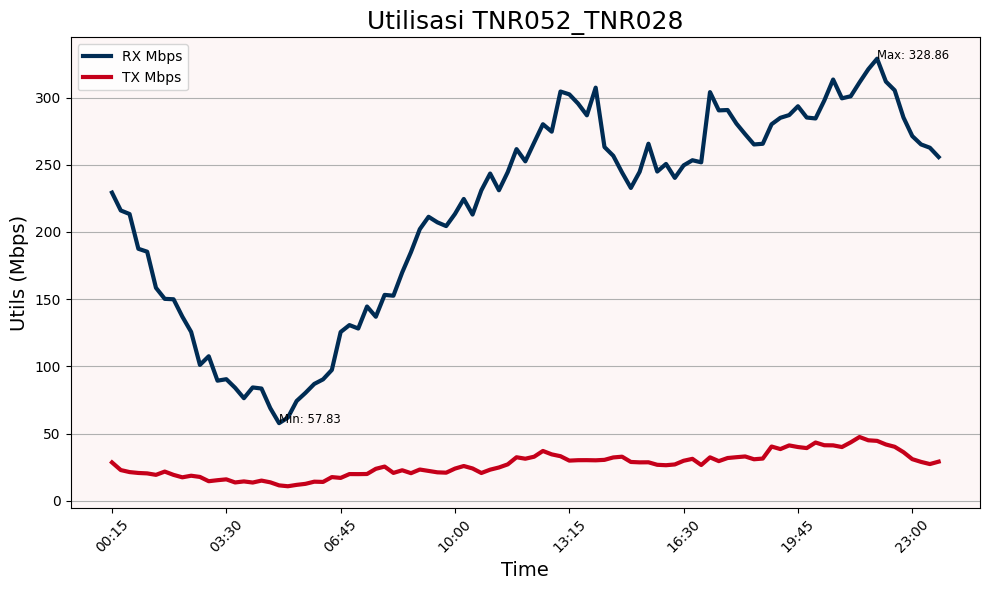

In [568]:
# Membuat grafik garis untuk RX Mbps dan TX Mbps
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor('#FDF6F6')

# Plot RX Mbps dan TX Mbps
# plt.plot(data.index, data['RX Mbps'], label='RX Mbps', color='blue', marker='o', linestyle='-', linewidth=2)
# plt.plot(data.index, data['TX Mbps'], label='TX Mbps', color='red', marker='o', linestyle='-', linewidth=2)

# Plot RX Mbps dan TX Mbps
plt.plot(data['Time Stamp'], data['RX Mbps'], label='RX Mbps', color='#002C54', linestyle='-', linewidth=3)
plt.plot(data['Time Stamp'], data['TX Mbps'], label='TX Mbps', color='#C5001A', linestyle='-', linewidth=3)

# Menambahkan judul grafik
file_base = os.path.splitext(os.path.basename(file_path))[0]
title_part = file_base.split('-')[4]
plt.title(f"Utilisasi {title_part}", fontsize= 18)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Utils (Mbps)', fontsize=14)

# Menambahkan legenda
plt.legend()

#interval data
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

# Menandai sumbu x berdasarkan index data
# plt.xlim([data['Time Stamp'].min(),data['Time Stamp'].max()])

# Menemukan nilai tertinggi
max_rx = data['RX Mbps'].max()
min_rx = data['RX Mbps'].min()

# Menampilkan baris data tertinggi
highest_rx = data.loc[data['RX Mbps'] == max_rx]
lowest_rx = data.loc[data['RX Mbps'] == min_rx]

# Menambahkan anotasi pada titik tertinggi
for idx, row in highest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Max: {row['RX Mbps']:.2f}", color='black', fontsize='small', ha='left')

for idx, row in lowest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Min: {row['RX Mbps']:.2f}", color='black', fontsize='small', ha='left')

# Menampilkan grafik
plt.grid(axis='y')
plt.xticks(data['Time Stamp'][::13], rotation=45)
plt.tight_layout()
plt.show()